## **이론**
__________________________________

Prophet 모델의 주요 구성요소는 Trend, Seasonality, Holiday 입니다. 이 세가지를 결합하면 아래의 공식으로 나타낼 수 있습니다.

#### **y(t)=g(t)+s(t)+h(t)+ϵi**

+ **g(t)** : piecewise linear or logistic growth curve for modelling non-periodic changes in time series  
+ **s(t)** : periodic changes (e.g. weekly/yearly seasonality)  
+ **h(t)** : effects of holidays (user provided) with irregular schedules  
+ **ϵi** : error term accounts for any unusual changes not accommodated by the model  

위에서 Trend 를 구성하는 g(t) 함수는 주기적이지 않은 변화인 트렌드를 나타냅니다. 부분적으로 선형 또는 logistic 곡선으로 이루어져 있습니다.   
그리고 Seasonality인 s(t) 함수는 weekly, yearly 등 주기적으로 나타나는 패턴들을 포함합니다.  
Holiday를 나타내는 h(t) 함수는 휴일과 같이 불규칙한 이벤트들을 나타냅니다. 만약 특정 기간에 값이 비정상적으로 증가 또는, 감소했다면, holiday로 정의하여 모델에 반영할 수 있습니다.   
마지막으로 ϵi는 정규분포라고 가정한 오차입니다.

## **튜토리얼**
__________________________________

이제 이론적인 설명을 마치고, prophet 패키지를 사용하여 향후 실적을 예측해봅시다. Prophet 패키지는 R과 Python을 지원하지만, 여기서는 Python을 사용하여 진행하겠습니다.  
튜토리얼에 사용될 데이터는 ‘2017-01-01’ 에서 ‘2019-12-27’ 까지의 일자 ‘ds’ 별 실적값 ‘y’ 으로 구성되어 있습니다.  
(이 글에서 다루는 데이터는 실제 서비스 실적 데이터가 아닌 임의의 샘플 데이터 임을 밝힙니다.)    
  
먼저 prophet과 필요한 패키지들을 import해줍니다.

In [ ]:
#!pip install fbprophet
#!pip install --upgrade plotly

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [3]:
# prophet의 로그 기능 끄기
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [5]:
m = Prophet()
m.fit(df)

In [24]:
#make_future_dataframe: 예측 날짜 구간 생성
#predict: 신뢰 구간을 포함한 예측 실행

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [25]:
forecast = m.predict(future)

In [26]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.185072,7.479965,8.965410,6.866977,7.562841,1.018145,1.018145,1.018145,0.048291,0.048291,0.048291,0.969855,0.969855,0.969855,0.0,0.0,0.0,8.203217
3266,2017-01-16,7.184041,7.840346,9.251723,6.864736,7.564008,1.344161,1.344161,1.344161,0.352285,0.352285,0.352285,0.991877,0.991877,0.991877,0.0,0.0,0.0,8.528203
3267,2017-01-17,7.183011,7.598998,9.102220,6.862498,7.565140,1.132590,1.132590,1.132590,0.119636,0.119636,0.119636,1.012955,1.012955,1.012955,0.0,0.0,0.0,8.315601
3268,2017-01-18,7.181980,7.435569,8.871779,6.860384,7.565335,0.966227,0.966227,0.966227,-0.066659,-0.066659,-0.066659,1.032885,1.032885,1.032885,0.0,0.0,0.0,8.148207
3269,2017-01-19,7.180949,7.464268,8.880574,6.858291,7.565509,0.979154,0.979154,0.979154,-0.072270,-0.072270,-0.072270,1.051424,1.051424,1.051424,0.0,0.0,0.0,8.160103


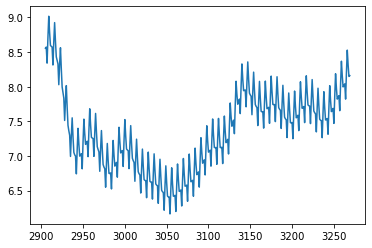

In [27]:
forecast.iloc[-365:, :].yhat.plot()

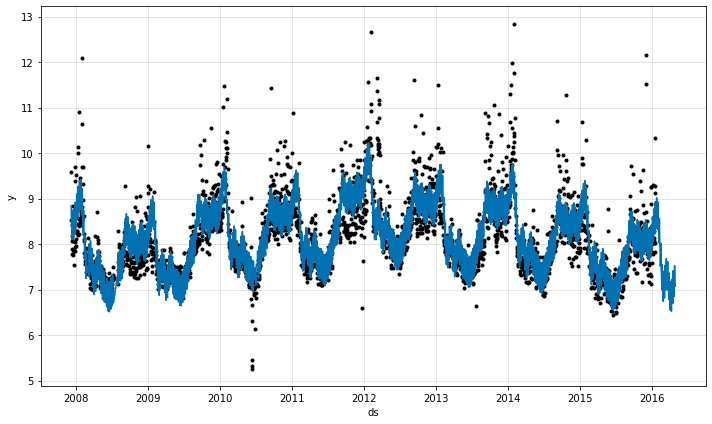

In [23]:
#plot: 원래의 시계열 데이터와 예측 데이터
#plot_components: 선형회귀 및 계절성 성분별로 분리
fig1 = m.plot(forecast, uncertainty=False)
plt.show()

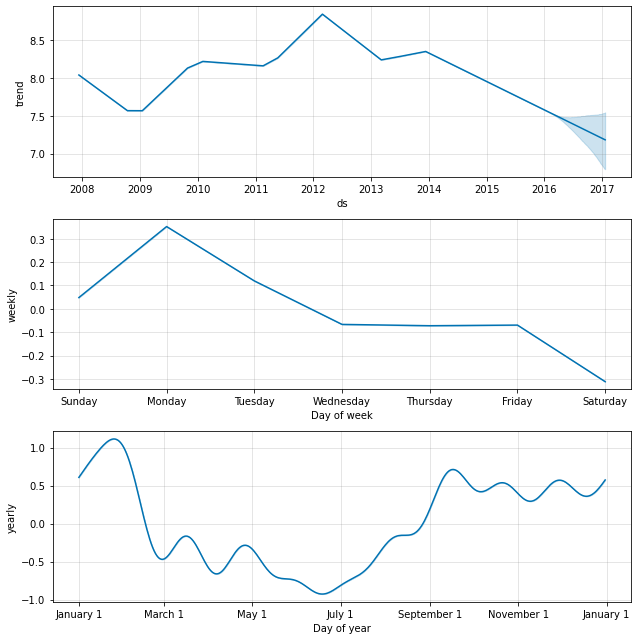

In [11]:
fig2 = m.plot_components(forecast)
plt.show()

### **기본 원리**
Prophet은 다음 순서로 시계열에 대한 회귀분석 모형을 만든다.

시간 데이터의 각종 특징을 임베딩해서 계절성 추정을 한다.  
나머지 데이터는 구간별 선형회귀(piecewise linear regression) 분석을 한다.  
  
선형 회귀분석은 전체 시계열의 앞 80%부분을 25개의 구간으로 나누어 실시한다. 구간 구분점(change point)는 changepoints 속성에 있다.

In [12]:
m.changepoints

93     2008-03-17
186    2008-06-20
279    2008-10-11
372    2009-01-14
465    2009-04-17
558    2009-07-19
650    2009-10-26
743    2010-01-31
836    2010-05-06
929    2010-08-14
1022   2010-11-15
1115   2011-02-16
1208   2011-05-20
1301   2011-08-21
1394   2011-11-24
1487   2012-02-27
1580   2012-05-31
1673   2012-09-01
1765   2012-12-02
1858   2013-03-05
1951   2013-06-06
2044   2013-09-08
2137   2013-12-10
2230   2014-03-14
2323   2014-06-15
Name: ds, dtype: datetime64[ns]

선형회귀모형의 기울기와 y-절편은 param 속성의 delta와 beta값에 있다.

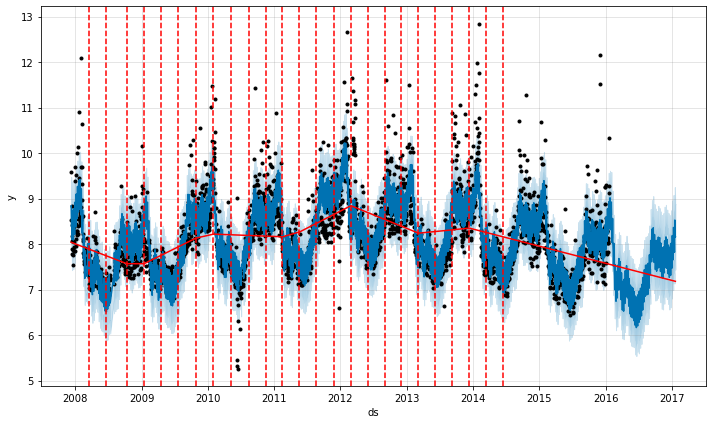

In [34]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m,forecast,  threshold=0)
plt.show()

### **신뢰구간**
prophet은 마지막 20% 데이터에 대해 선형회귀분석을 하고 신뢰구간을 계산할 수 있다.  
신뢰구간은 구간별 기울기의 분포를 라플라스 확률분포로 추정한 후 기울기 변화를 가정하는 방법으로 신뢰구간을 계산한다.

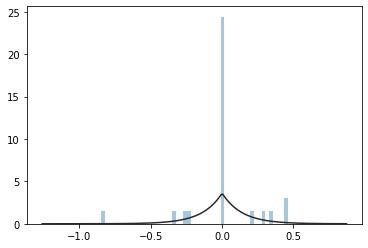

In [38]:
sns.distplot(m.params["delta"], kde=False, fit=sp.stats.laplace)
plt.show()